# Day 2 of ATHENS November 2024 week
# Free Vibration of a Beam 

In [18]:
using LinearAlgebra
using DifferentialEquations
using Plots 

## Problem Definition and Analytical Solution 

Plot here $u(x,t) = \sin(\pi*x - c*\pi*t)$. 

Initial position $u_0(x) = \sin(\pi*x)$. 

Initial velocity $v_0(x) = (-c*\pi)\cos(\pi*x)$.  

Set physical constants 

In [282]:
# set spacing in x
N = 100; h = 1/N; h2 = h*h; 
# xset spacing in t 
Tend = 3; M = 100; dt = Tend/M 
# set velocity 
c = 2; 

Set spacing in x and t domain

In [283]:
x = [(i-1)*h for i = 1:N+1]
t = [(j-1)*dt for j = 1:M];

Plot the analytical solution 

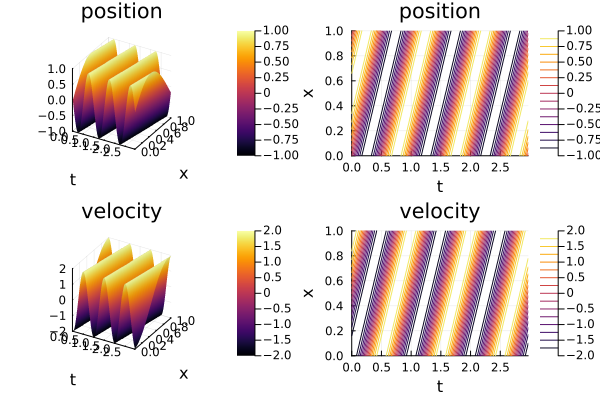

In [284]:
uanal = [sin(pi*xi-c*pi*tj) for xi in x, tj in t]
vanal = [(-c)*cos(pi*xi-c*pi*tj) for xi in x, tj in t]
p1 = surface(t,x,uanal, xlabel="t", ylabel="x", title="position")
p2 = contour(t,x,uanal, xlabel="t", ylabel="x", title="position")
p3 = surface(t,x,vanal, xlabel="t", ylabel="x", title="velocity")
p4 = contour(t,x,vanal, xlabel="t", ylabel="x", title="velocity")
plot(p1,p2,p3,p4, layout = (2,2) )

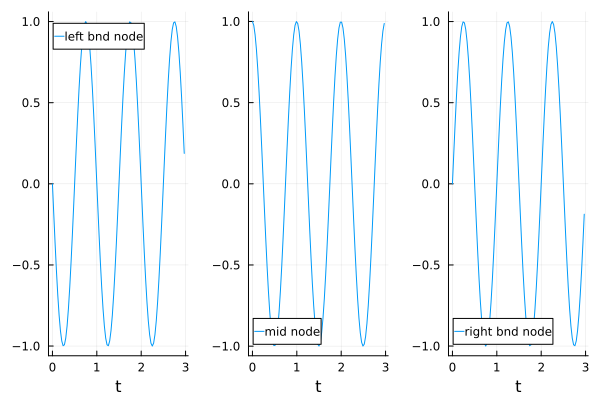

In [285]:
p1 = plot(t,uanal[1,:],xlabel="t", label="left bnd node")
p2 = plot(t,uanal[div(N,2),:],xlabel="t", label="mid node")
p3 = plot(t,uanal[end,:],xlabel="t", label="right bnd node")
plot(p1,p2,p3,layout=(1,3))

## Building the Matrix (size reduced)

In [286]:
#? Tridiagonal

In [287]:
function build_matrix(N)
    h = 1/N # mesh width
    f = zeros(N-1) 
    e = ones(N-1) # diagonal vector 
    A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes
    A = 1/(h*h)*A 
    # A[1,1] = 0; A[1,2] = 0; # Dirichlet in the left end point
    # A[end,end] = 1/h; A[end, end-1] = -1/h; # Neumann in right end point
    # A[end,end] = 0; A[end, end-1] = 0; # Neumann in right end point
    return A,f 
end 

build_matrix (generic function with 1 method)

In [288]:
A,f = build_matrix(N);

In [349]:
#display(A)

In [290]:
#display(f)

99-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Build the Right-Hand Side Function  

In [356]:
function wave_system!(ddu,du,u,p,t)
    f[1]   = (-1/h2)*sin(-pi*c*t)   # left boundary node contribution 
    f[end] = (-1/h2)*sin(pi-c*pi*t) # right boundary node contribution
    ddu .= c^2*A*u .+ c^2*f   
end

wave_system! (generic function with 2 methods)

## Solve the ODE problem 

In [ ]:
# set initial position and velocity 
u0 = [ sin(pi*xi) for xi in x[2:end-1]] 
v0 = [ (-pi*c)*cos(pi*xi) for xi in x[2:end-1]]

tspan = (0.0, Tend) # (start time, end time)               

prob = SecondOrderODEProblem(wave_system!,v0,u0,tspan) # problem definition 

sol = solve(prob,AutoVern7(Rodas5()), reltol = 1e-8, abstol = 1e-8); # problem solve

In [ ]:
sol.t

## Post Processing 

In [ ]:
p1 = plot(x[2:end-1], u0, xlabel="x", label="initial position")
p2 = plot(x[2:end-1], v0, xlabel="x", label="initial velocity")
plot(p1,p2,layout=(1,2))

In [ ]:
velind = 1:N-1; posind = N:2*N-2; 
Nt = length(sol.t)
V  = sol[velind,:]
p1 = contour(V)
U  = sol[posind,:]
p2 = contour(U)
plot(p1, p2, layout= (1,2))

In [348]:
size(U)

(99, 2794)